<a id=0></a>
# 9.Regression Models
※　代表的な回帰分析モデルの紹介  
※　モデルの評価、交差検証、パラメータのグリッドサーチ

---
### [1. 探索的データ分析（EDA）](#1)
### [2. LinearRegression](#2)
### [3. RandomForestRegressor](#3)
### [4. KNeighborsRegressor](#4)
### [5. モデルの評価](#5)
### [6. クロスバリデーションとグリッドサーチ](#6)
---

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA）¶

* 糖尿病のデータセット
* 分布の確認
* 相関関係
* トレインデータ、テストデータ

糖尿病のデータセット

In [177]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [178]:
for k in diabetes:
    print(k)

data
target
frame
DESCR
feature_names
data_filename
target_filename
data_module


In [179]:
X = diabetes['data']
y = diabetes['target']

In [180]:
X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [181]:
y = y.reshape(-1, 1)
Xy = np.concatenate([X, y], axis=1)

In [182]:
Xy.shape

(442, 11)

In [183]:
df = pd.DataFrame(Xy, columns=diabetes['feature_names']+['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [184]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [185]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


分布の確認

In [186]:
def plot_data(feature):
    fig, axes = plt.subplots(1, 3, figsize=(16, 4), tight_layout=True)
    sns.histplot(data=df, x=feature, hue='sex', multiple='stack', shrink=0.9, palette='Set1', ax=axes[0])
    axes[0].legend([], frameon=False)
    sns.boxplot(data=df, x='sex', y=feature, width=0.5, ax=axes[1])
    axes[1].set_xticklabels([])
    sns.scatterplot(data=df, x=feature, y='target', hue='sex', alpha=0.7, palette='Set2', ax=axes[2])
    axes[2].legend([], frameon=False)
    

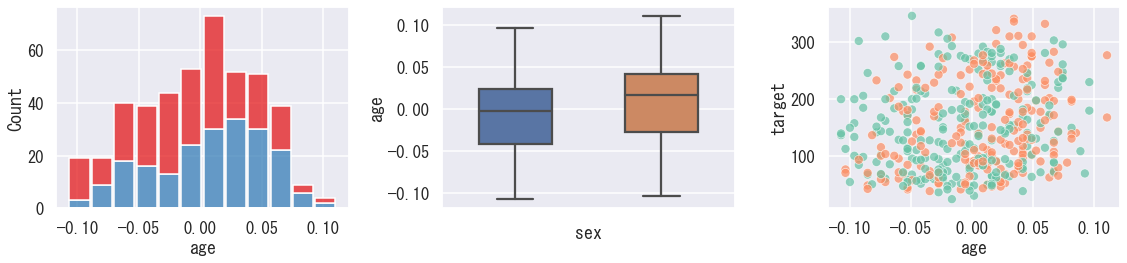

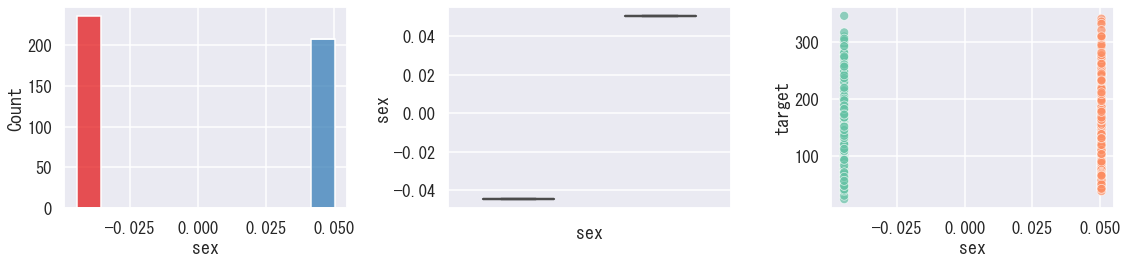

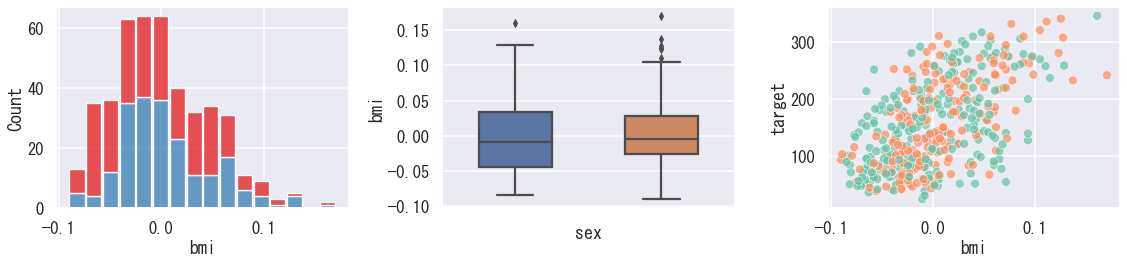

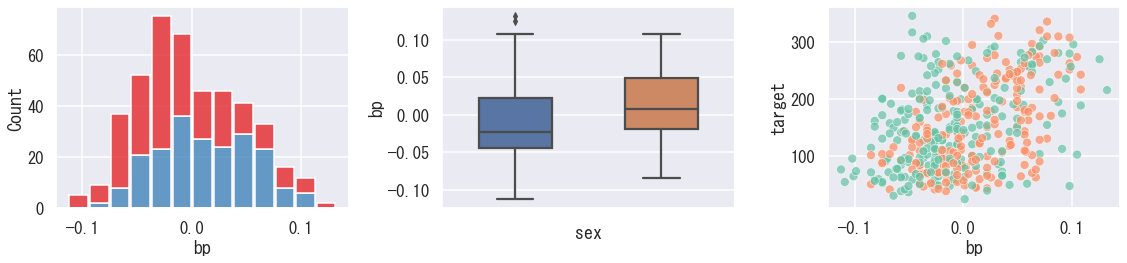

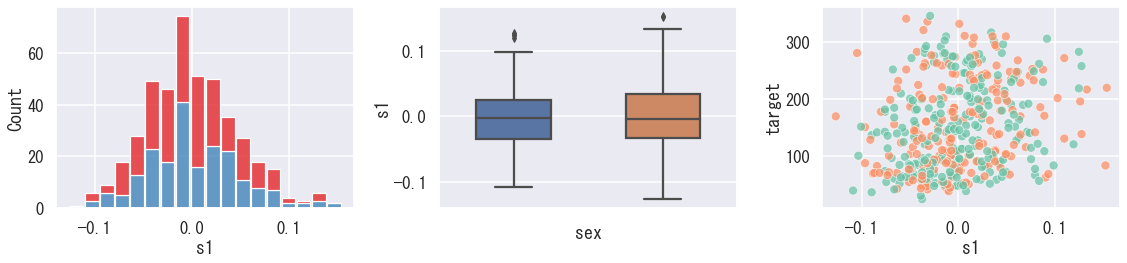

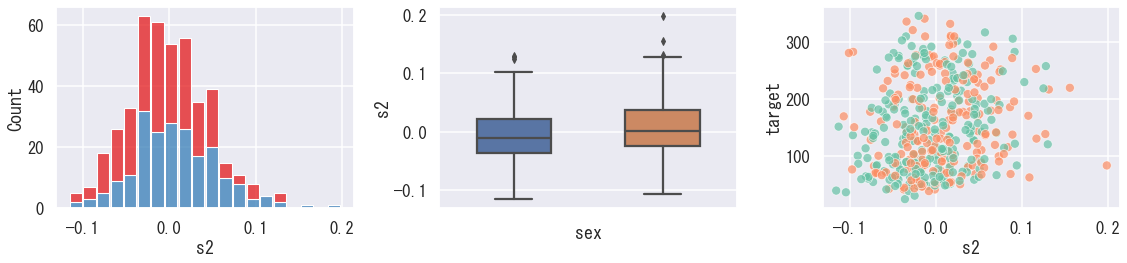

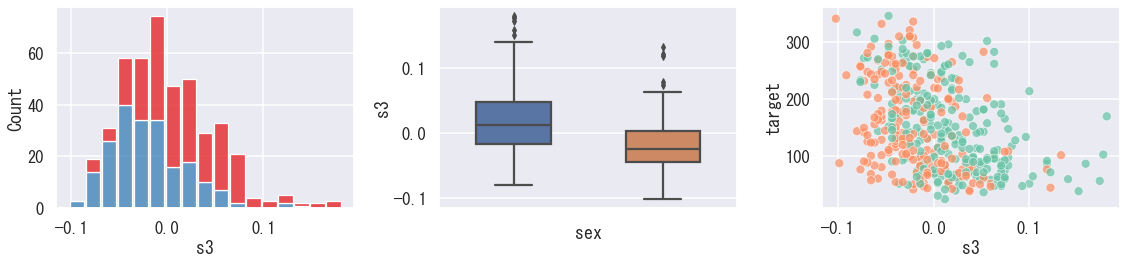

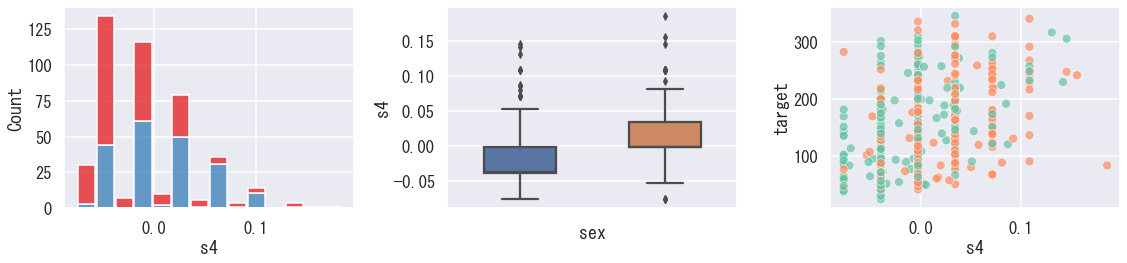

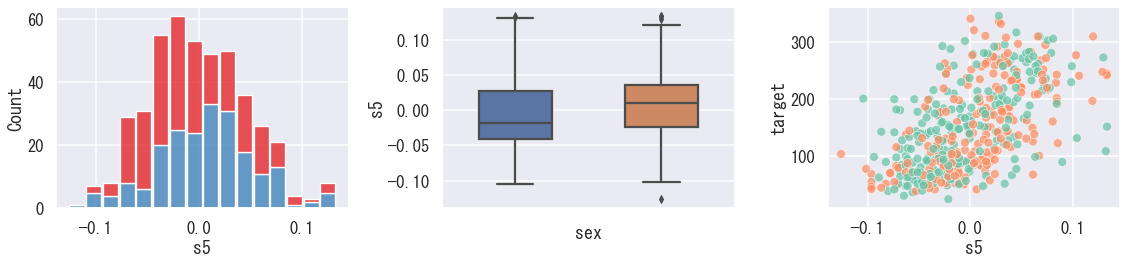

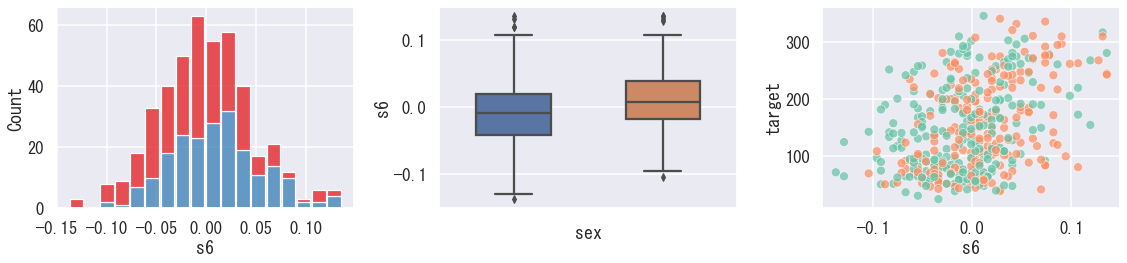

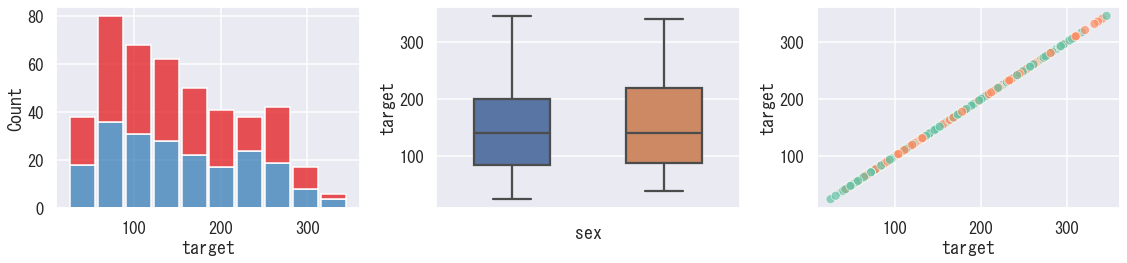

In [187]:
for feat in df.columns:
    plot_data(feat)

相関関係

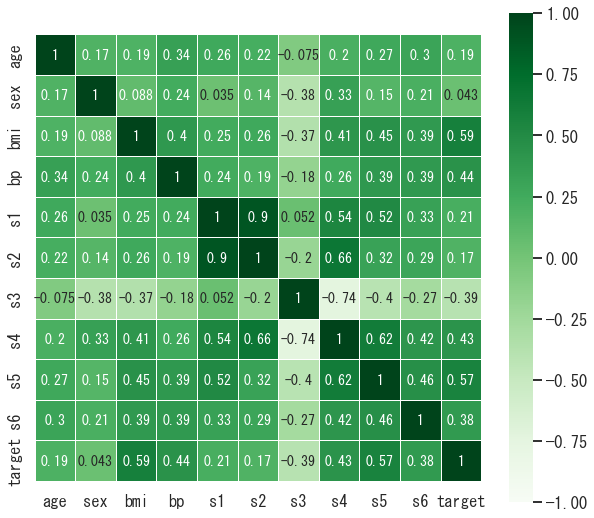

In [188]:
plt.figure(figsize=(10, 9))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 14}, 
            cmap='Greens', square=True, linewidths=1, vmin=-1)
plt.show()

性別で分けてみる

In [189]:
df_s0 = df[df['sex'] > 0].drop(columns=['sex'], axis=0)
df_s1 = df[df['sex'] < 0].drop(columns=['sex'], axis=0)

In [190]:
df_s0

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
6,-0.045472,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
...,...,...,...,...,...,...,...,...,...,...
428,0.048974,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066051,0.131470,310.0
431,0.070769,-0.030996,0.021872,-0.037344,-0.047034,0.033914,-0.039493,-0.014960,-0.001078,66.0
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0


トレインデータ、テストデータ

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [193]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309, 1), (133, 1))

In [194]:
X0_train, X0_test, y0_train, y0_test = train_test_split(df_s0.iloc[:,:-1], df_s0.iloc[:,-1], test_size=0.3)

In [195]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_s1.iloc[:,:-1], df_s1.iloc[:,-1], test_size=0.3)


---
<a id=2></a>
[Topへ](#0)

---
## 2. LinearRegression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html  
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* モデルの構築・予測・属性
* 実測値と予測値の比較
* スコア
* 性別ごとのデータで試してみる
---

モデルのインポート

In [196]:
from sklearn.linear_model import LinearRegression

モデルインスタンスの作成

In [197]:
lr_model = LinearRegression()

モデルの構築・予測・属性

In [198]:
lr_model.fit(X_train, y_train)

LinearRegression()

実測値と予測値の比較

In [199]:
lr_pred = lr_model.predict(X_test)

In [200]:
df_result = pd.DataFrame()
df_result['true_value'] = y_test.flatten()
df_result['prediction'] = lr_pred.flatten()
df_result['residual'] = y_test - lr_pred
df_result.sort_values(by=['true_value', 'prediction'], ignore_index=True, inplace=True)

In [201]:
df_result

,true_value,prediction,residual
0,31.0,92.605599,-61.605599
1,37.0,78.207916,-41.207916
2,39.0,57.573914,-18.573914
3,42.0,75.435889,-33.435889
4,48.0,200.201400,-152.201400
...,...,...,...
128,292.0,199.769002,92.230998
129,293.0,197.906776,95.093224
130,306.0,254.163280,51.836720
131,317.0,228.936897,88.063103


<Axes: ylabel='true_value'>

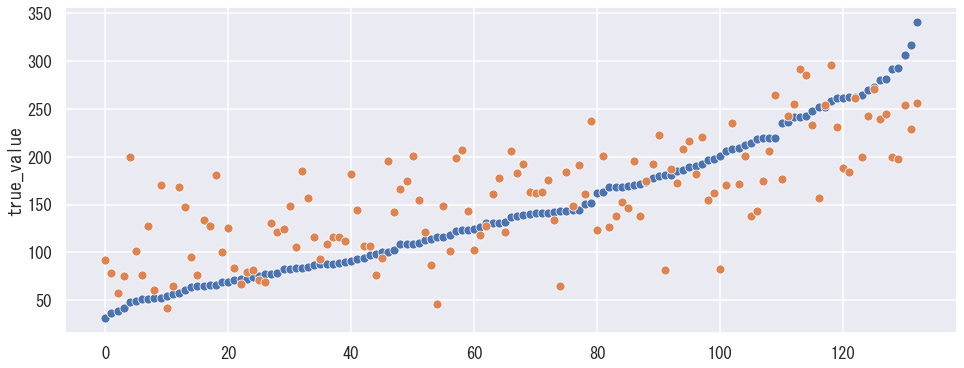

In [202]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_result, x=df_result.index, y='true_value')
sns.scatterplot(data=df_result, x=df_result.index, y='prediction')

スコア

In [203]:
lr_model.score(X_test, y_test)

0.5029414981360987

In [204]:
lr_model.score(X_train, y_train)

0.5129477776650623

性別ごとのデータで試してみる

In [205]:
lr_model_s0 = LinearRegression()
lr_model_s0.fit(X0_train, y0_train)
lr_model_s0.score(X0_test, y0_test), lr_model_s0.score(X0_train, y0_train)

(0.4233837817235213, 0.655493111277964)

In [206]:
lr_model_s1 = LinearRegression()
lr_model_s1.fit(X1_train, y1_train)
lr_model_s1.score(X1_test, y1_test), lr_model_s1.score(X1_train, y1_train)

(0.39193296753875906, 0.4434150035948078)

---
<a id=3></a>
[Topへ](#0)

---
## 3. RandomForestRegressor

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* パラメータを変更してみる
* Treeの可視化
---

モデルのインポート

In [207]:
from sklearn.ensemble import RandomForestRegressor

モデルインスタンスの作成

In [208]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

モデルの構築・属性・予測・スコア

In [209]:
rf_model.fit(X_train, y_train)

C:\Users\arata\AppData\Local\Temp\ipykernel_10460\223814155.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [210]:
rf_pred = rf_model.predict(X_test)
rf_pred[:5]

array([178.95, 262.73, 199.92,  97.4 , 200.1 ])

In [211]:
rf_model.score(X_test, y_test)

0.49293712100184384

In [212]:
rf_model.score(X_train, y_train)


0.9152555304560637

パラメータを変更してみる

In [213]:
rf_model_opt = RandomForestRegressor(
    n_estimators=100,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features=0.6,
    bootstrap=True,
    random_state=42,
    max_samples=0.7
)
rf_model_opt.fit(X_train, y_train)
rf_model_opt.score(X_test, y_test), rf_model_opt.score(X_train, y_train)


C:\Users\arata\AppData\Local\Temp\ipykernel_10460\424424585.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_opt.fit(X_train, y_train)


(0.4716968448926415, 0.745753545558679)

Treeの可視化

In [214]:
rf_model.estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=1608637542)

In [215]:
from sklearn.tree import plot_tree

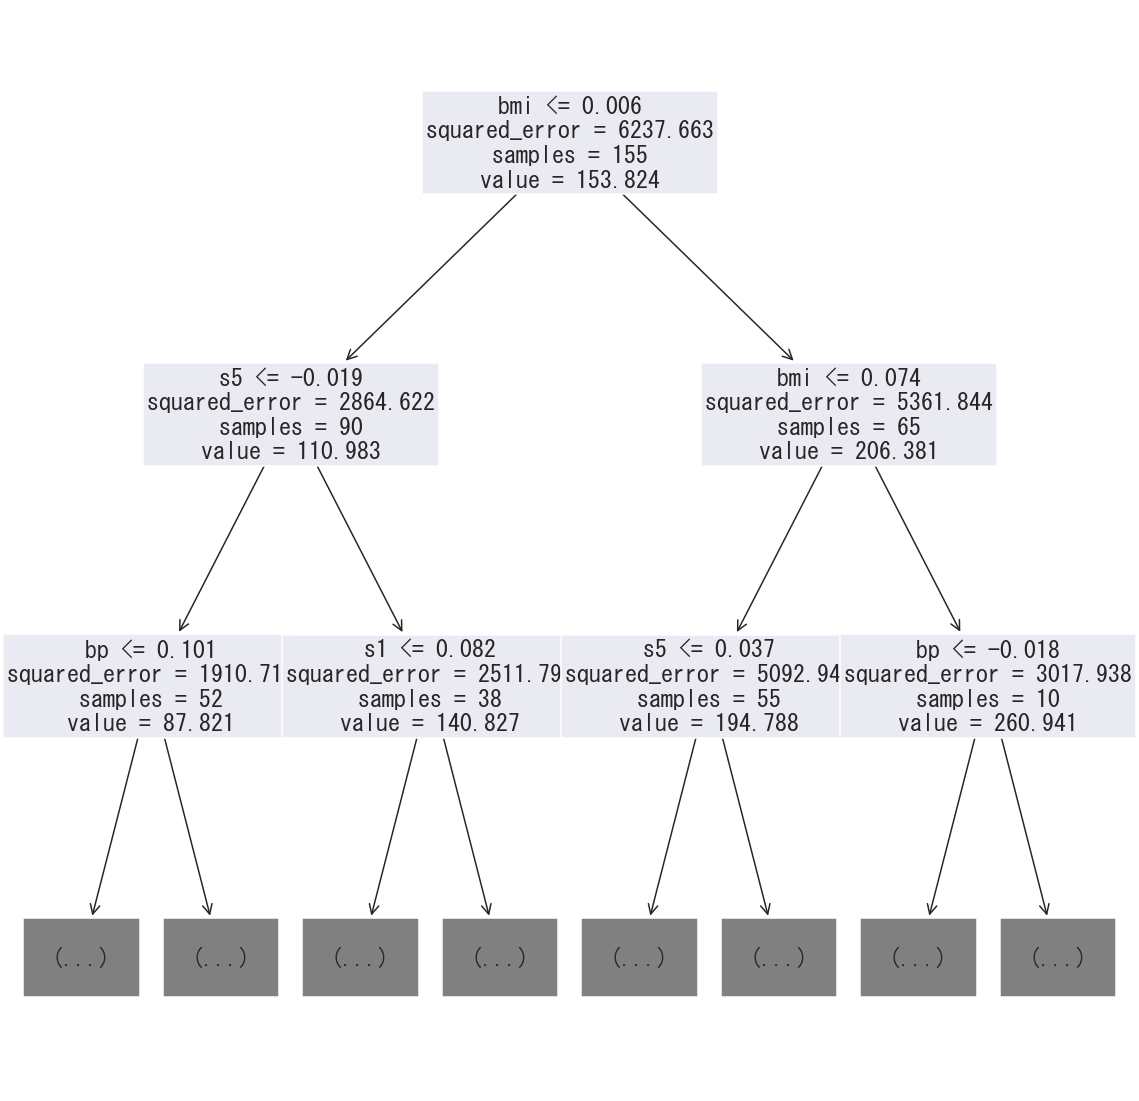

In [216]:
plt.figure(figsize=(20, 20))
plot_tree(rf_model_opt.estimators_[0], max_depth=2, fontsize=24, feature_names=diabetes['feature_names'])
plt.show()

---
<a id=4></a>
[Topへ](#0)

---
## 4. KNeighborsRegressor

* モデルのインポート  
     https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html  
* モデルインスタンスの作成・スコア
* パラメータを変更してみる
---

モデルのインポート

In [217]:
from sklearn.neighbors import KNeighborsRegressor

モデルインスタンスの作成・スコア

In [218]:
kn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [219]:
kn_model.fit(X_train, y_train)
kn_pred = kn_model.predict(X_test)
kn_pred[:5]

array([[223.8],
       [222.8],
       [205.4],
       [ 83. ],
       [186. ]])

In [220]:
kn_model.score(X_test, y_test)

0.4343232253798741

In [221]:
kn_model.score(X_train, y_train)

0.5832314740704695

パラメータを変更してみる

In [222]:
kn_model_new = KNeighborsRegressor(n_neighbors=8, weights='distance')

In [223]:
kn_model_new.fit(X_train, y_train)
kn_pred = kn_model_new.predict(X_test)
kn_pred[:5]

array([[209.98376732],
       [242.94296299],
       [195.82575674],
       [113.04768956],
       [197.0757461 ]])

In [224]:
print(kn_model_new.score(X_test, y_test))
print(kn_model_new.score(X_train, y_train))

0.4578662550844653
1.0


---
<a id=5></a>
[Topへ](#0)

---
## 5. モデルの評価方法

* 評価指標
* モデルを評価する
* R2スコア(決定係数)とは
---

評価指標  
絶対平均誤差　/　二乗平均誤差　/　絶対パーセント誤差　/　R二乗値（決定係数）

In [225]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

モデルを評価する  

In [226]:
def eval_models(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        score = np.round(model.score(X_test, y_test), 4)
        mae = np.round(mean_absolute_error(y_test, pred), 4)
        mse = np.round(mean_squared_error(y_test, pred), 4)   # 2乗するため、誤差の大きさが目立つようになる
        mape = np.round(mean_absolute_percentage_error(y_test, pred), 4)   # 予測値のスケールに寄らず、相対的に理解できる
        r2 = np.round(r2_score(y_test, pred), 4)
        print(f'{model}')
        print(f'score : {score}, mae : {mae}, mse : {mse}, mape : {mape}, r2 : {r2}')
        print('================================')

In [228]:
models = [lr_model, rf_model_opt, kn_model_new]
eval_models(models, X_train, y_train, X_test, y_test)

LinearRegression()
score : 0.5029, mae : 41.3699, mse : 2692.2859, mape : 0.3929, r2 : 0.5029
RandomForestRegressor(max_depth=6, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, random_state=42)
score : 0.4717, mae : 43.3543, mse : 2861.5206, mape : 0.4191, r2 : 0.4717
KNeighborsRegressor(n_neighbors=8, weights='distance')
score : 0.4579, mae : 42.649, mse : 2936.4331, mape : 0.4101, r2 : 0.4579


C:\Users\arata\AppData\Local\Temp\ipykernel_10460\992719818.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


R2スコア(決定係数)とは

* R2 = 1 - Σ{( true_value(i) - pred(i) ) ** 2} / Σ{( true_value(i) - true_value_mean ) ** 2}
* 1に近いほど回帰式の精度が高い
* もし、すべてを「平均」で予想した場合(最も安易な？予想)　=> R2 = 0
* 0.5以上：予測精度がそれなりに高いと言える
* 0.7以上：予測精度が高い
* 0.9以上：精度が非常に高い。ただし、過学習でないかの検討も必要  
※　絶対的な基準は存在しません。あくまでも目安として用いる指標です

---
<a id=6></a>
[Topへ](#0)

---
## 6. クロスバリデーションとグリッドサーチ

* KFold  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
* cross_val_score  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* GridSearchCV  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
---

KFold

In [229]:
from sklearn.model_selection import KFold, cross_val_score

In [246]:
k = KFold(10, shuffle=True, random_state=42)

cross_val_score

In [247]:
for model in models:
    scores = cross_val_score(model, X, y.flatten(), cv=k)
    print(f'{model} : {scores.mean()}')
    print('\n')

LinearRegression() : 0.4648921045075478


RandomForestRegressor(max_depth=6, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, random_state=42) : 0.43411250942942897


KNeighborsRegressor(n_neighbors=8, weights='distance') : 0.3927645324490283




GridSearchCV

In [248]:
from sklearn.model_selection import GridSearchCV

In [249]:
# rf_modelのパラメータを変更する
# max_depth=4, min_samples_split=5, max_features=0.6, max_samples=0.7
params = {
    'max_depth':[2, 6, 10],
    'max_features':[0.5, 0.9],
    'max_samples':[0.5, 0.9],
    'min_samples_split':[3, 6]
}
# 計２４の組み合わせで結果を取得できる

In [250]:
grid = GridSearchCV(rf_model, param_grid=params)

In [252]:
grid.fit(X, y.flatten())

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 6, 10], 'max_features': [0.5, 0.9],
                         'max_samples': [0.5, 0.9],
                         'min_samples_split': [3, 6]})

In [254]:
pd.DataFrame(grid.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093369,0.002310,0.005329,0.000229,2,0.5,0.5,3,"{'max_depth': 2, 'max_features': 0.5, 'max_sam...",0.325824,0.484587,0.448996,0.379985,0.459921,0.419863,0.058440,18
1,0.089565,0.001613,0.005265,0.001248,2,0.5,0.5,6,"{'max_depth': 2, 'max_features': 0.5, 'max_sam...",0.325824,0.484587,0.448996,0.379985,0.459921,0.419863,0.058440,18
2,0.102311,0.014323,0.005304,0.000612,2,0.5,0.9,3,"{'max_depth': 2, 'max_features': 0.5, 'max_sam...",0.322357,0.476256,0.454195,0.359270,0.456340,0.413683,0.061119,21
3,0.104908,0.007183,0.005314,0.000253,2,0.5,0.9,6,"{'max_depth': 2, 'max_features': 0.5, 'max_sam...",0.322357,0.476256,0.454195,0.359270,0.456340,0.413683,0.061119,21
4,0.105922,0.006476,0.005424,0.000354,2,0.9,0.5,3,"{'max_depth': 2, 'max_features': 0.9, 'max_sam...",0.357393,0.497024,0.460493,0.337149,0.456584,0.421729,0.062737,15


In [255]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.116441,0.000514,0.005818,0.000675,10,0.5,0.5,6,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",0.365944,0.526457,0.465179,0.395912,0.499135,0.450525,0.060795,1
9,0.110131,0.000391,0.005503,0.000542,6,0.5,0.5,6,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.370827,0.522594,0.467161,0.400563,0.488974,0.450024,0.056206,2
8,0.113677,0.000750,0.005254,0.000391,6,0.5,0.5,3,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.377771,0.518460,0.476364,0.387755,0.488056,0.449681,0.056429,3
21,0.144387,0.004857,0.005618,0.000507,10,0.9,0.5,6,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.395674,0.531910,0.460849,0.384659,0.473472,0.449313,0.054030,4
12,0.142126,0.007125,0.006230,0.000398,6,0.9,0.5,3,"{'max_depth': 6, 'max_features': 0.9, 'max_sam...",0.392955,0.522386,0.451813,0.389981,0.472348,0.445896,0.050029,5
16,0.129798,0.006778,0.005571,0.000392,10,0.5,0.5,3,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",0.383537,0.511007,0.441654,0.405545,0.485365,0.445422,0.047605,6
20,0.157160,0.005479,0.006177,0.001019,10,0.9,0.5,3,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.380744,0.538364,0.450682,0.394995,0.461253,0.445208,0.055933,7
13,0.132494,0.002944,0.005511,0.000638,6,0.9,0.5,6,"{'max_depth': 6, 'max_features': 0.9, 'max_sam...",0.389081,0.526397,0.455143,0.372258,0.477576,0.444091,0.056927,8
19,0.143097,0.005618,0.006411,0.001602,10,0.5,0.9,6,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",0.374082,0.529386,0.452107,0.401118,0.459515,0.443242,0.053520,9
10,0.134680,0.009334,0.005597,0.000374,6,0.5,0.9,3,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.392534,0.516752,0.442267,0.382498,0.479041,0.442618,0.050883,10


In [256]:
grid.best_params_

{'max_depth': 10,
 'max_features': 0.5,
 'max_samples': 0.5,
 'min_samples_split': 6}

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---